
# INVESTIGATION AND EXPLORATORY ANALYSIS OF THE "No Show Appointment" DATASET FROM BRAZIL.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset was collected from hospitals in Brazil and it includes some information about patients registered at the hospitals including if they showed up on their due appointment date or not. The table has 14 columns in total that describes various information about the patients.
The columns are:

>"PatientId" - a unique ID for each patient. 

>"AppointmentID" - a unique appointment ID 

>"Gender" - identifies gender of the patients 

>"ScheduledDay" - Scheduled day for appointment 

>"AppointmentDay" - appointment day

>"Age" - age of patients in years

>"Neighbourhood" - location of hospitals 

>"Scholarship" - if patient is enroll in welfare program 

>Columns that identifies an underlying illness  in patients - "Hipertension", "Diabetes", "Alcoholism", "Handcap". 

>"SMS_received" - if patient receives sms

>"No-show" - if patient showed up or not


### Investigated Questions 
This investigation would try to answer some questions around the likehood of gender, age or underlying health conditions affecting show up of patients on appointment day. We pose the questions as;

>Does gender differences among patients has correlation with keeping to appointments?

>Are age and gender a factor in keeping to scheduled date among patients?

>How does an underlying health condition among genders influences showing up for appointments among patients?

In [1]:
# import packages and libraries for analysis 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [36]:
# Using pandas' read_csv to load and read the dataset into a dataframe 
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
51520,1.673252e+12,5737673,M,2016-05-25T09:53:40Z,2016-05-25T00:00:00Z,56,CENTRO,0,1,0,0,0,0,No
70107,1.421857e+13,5647119,F,2016-05-02T12:55:34Z,2016-05-02T00:00:00Z,19,JARDIM DA PENHA,0,0,0,0,0,0,No
68765,4.416813e+13,5700869,M,2016-05-16T09:51:17Z,2016-05-16T00:00:00Z,44,SÃO BENEDITO,1,0,0,1,0,0,No
53122,7.953439e+14,5703122,F,2016-05-16T13:32:16Z,2016-05-16T00:00:00Z,8,MARIA ORTIZ,0,0,0,0,0,0,No
96181,5.836297e+13,5667283,M,2016-05-06T07:35:57Z,2016-06-03T00:00:00Z,65,JARDIM DA PENHA,0,0,0,0,0,0,No


>**"No-show"** would be renamed **"showed_up?"** as asking if the patient showed up for appointment.

> In addition, answering "No" if a patient showed up or "Yes" if they didn't is counterintuitive. Hence, in the column,  "Yes" will be swapped for "No" and vice versa. **Yes** will me **"Yes"** if a patient showed up and **"No"** will mean **"No"** if they didn't. 


In [3]:
df.shape #view the number of rows and columns of the dataset

(110527, 14)

> *The data has 110527 rows and 14 columns*

In [4]:
sum(df.duplicated()) #check for duplicates 


0

> *The dataset has no duplicated row*

In [5]:
df.info() #View the number of entries, columns names and data types in the file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The columns have equal numbers of entries and non has missing entries. However, 

> **"Hipertension"** should be given its correct spelling **"hypertension"** and in lower case.


In [6]:
df.describe() #Compute some descriptive statistics of numerical data

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The **"age"** statistic has negative one (-1) as its minimum value and its row should be dropped from the dataset as this value is not realistic for an age.

> **"AppointmentID"** and **"PatientId"** data type would need to be changed from integer to string types. They are for reference purposes only and not 'mathematical objects' for statistical computation.

> **"AppointmentDay"** and **"ScheduledDay"** string data type would be change to pandas datetime data types to permit possible datetime operations.

> Other patients information like **"Hipertension"**, **"Diabetes"** and **"Alcoholism"** should not have descriptive statistic computed and should be decoded as; **"Yes"** for **"1"** and **"No"** for **"0"**. This will also make the entries more intuitive especially during explorations. 


### Data Cleaning
 >Noted anomalies and needed changes listed above will be implemented below.

> The following codes checks ***How many rows has "age" == -1?*** Before they  are dropped.

In [7]:
 df.query('Age == "-1"')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [37]:
# Drop the sole row with age "-1"

df.drop(df.index[df[df["Age"] == -1].index], inplace= True)


In [9]:
#Check if age -1 is removed 
df["Age"].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> *Age -1 is dropped*

**The codes below;**

> Renames **"No-show"** to **"showed_up?"**

> Renames **"Hipertension"** to **'hypertension'**

In [38]:
df.rename(columns={"No-show": "showed_up?", "Hipertension": "hypertension"}, inplace =True)


In [26]:
df.head() #check if rename is successful 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,Handcap,SMS_received,showed_up?
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> *Names have changed*

**The codes below**

> counts the unique elements of showed_up

> Re-assign names to the elements in showed_up; **'No'** to **'Yes'** and vice versa 




In [39]:
#count unique items of showed_up 
df["showed_up?"].value_counts(normalize=True)


No     0.798066
Yes    0.201934
Name: showed_up?, dtype: float64

In [40]:
#Swap Yes for No and vice versa 
df["showed_up?"] = df["showed_up?"].replace(["No", "Yes"], ["Ys", "No"])


In [41]:
#check if values are changed and value_counts composition is the same
df["showed_up?"].value_counts(normalize=True)

Ys    0.798066
No    0.201934
Name: showed_up?, dtype: float64

> *Column's value count composition, compared to the above, remain the same except for the swap in name.*

**The codes below;**

> Change format of the AppointmentID and ScheduledDay to pandas datetime format 
    

In [42]:
date_cols = ["AppointmentDay", "ScheduledDay"]
for column in date_cols:
    df[column] = pd.to_datetime(df[column])

In [43]:
#Check if format has changed
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
showed_up?        110526 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


> *format has changed*

**The codes below***

>Changes "PatientId" and "AppointmentID" to str.

In [44]:
str_cols = ["PatientId", "AppointmentID"]
for column in str_cols:
    df[column] = df[column].astype('str')
    

In [45]:
df.info() #check if data type is changed 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null object
AppointmentID     110526 non-null object
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
showed_up?        110526 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 12.6+ MB


>*Data type is changed*

**In the following codes;**

>The values of "Scholarship", "hypertension", "diabetes" 
and "SMS_received" are decoded to categorical values: 'Yes'(1)
or 'No'(0).



In [46]:
cols = ["Scholarship", "hypertension", "Diabetes", "SMS_received", "Alcoholism"]
for column in cols:
    df[column] = df[column].replace([0, 1], ["No", "Yes"])

In [47]:
df.head() #check if values are decoded 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,Handcap,SMS_received,showed_up?
0,2.98724998243e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,0,No,Ys
1,5.58997776694e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,0,No,Ys
2,4.26296229995e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,0,No,Ys
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,0,No,Ys
4,8.84118644818e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,0,No,Ys


>*Values are decoded*

<a id='eda'></a>
## Exploratory Data Analysis

### General Exploration of Some Features 

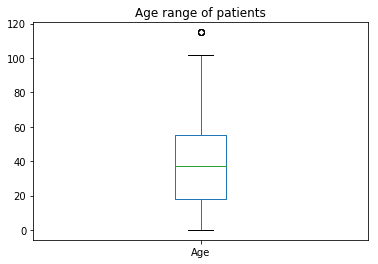

In [48]:
df.Age.plot(kind = "box", 
         
            title = "Age range of patients" 
);

In [49]:
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> *The statistics and boxplots above indicates a wide range in ages of patients attending the hospital.*

> *The mean and 50% quantile age range coincide at approximately 37 years old for all patients.*

> *Although an outlier in the plot above, 115 is not unrealistic.*

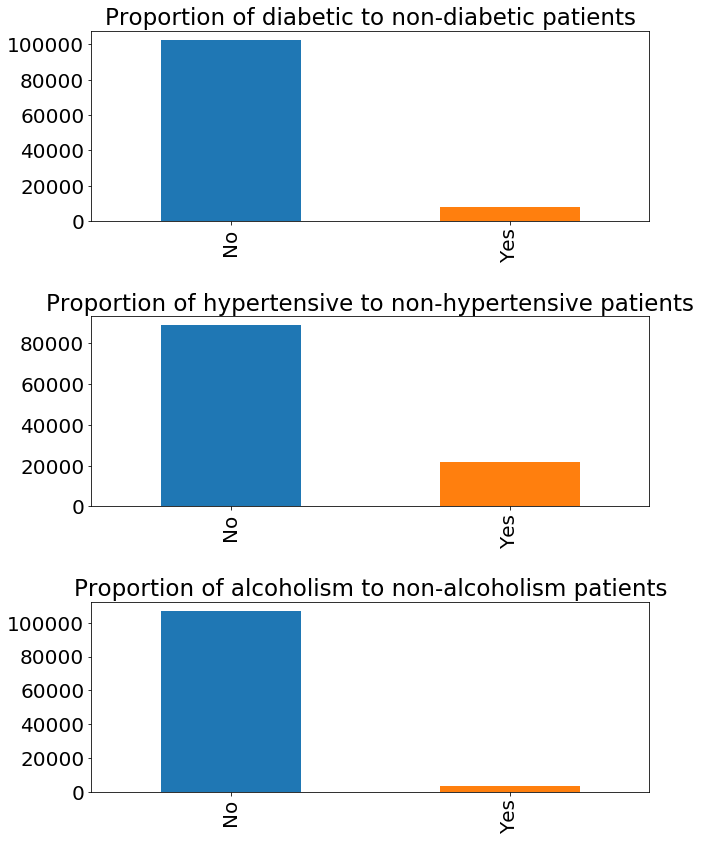

In [50]:
#plot of proportion of patients having or not having a disease 
fig, ax = plt.subplots(3, 1, figsize=(10,14))
df["Diabetes"].value_counts().plot.bar(ax = ax[0],fontsize=20 )
df["hypertension"].value_counts().plot.bar(ax = ax[1],fontsize=20) 
df["Alcoholism"].value_counts().plot.bar(ax = ax[2],fontsize=20) 
ax[0].set_title("Proportion of diabetic to non-diabetic patients", fontsize=23)
ax[1].set_title("Proportion of hypertensive to non-hypertensive patients", fontsize=23)
ax[2].set_title("Proportion of alcoholism to non-alcoholism patients", fontsize=23)
plt.subplots_adjust(hspace=.5);


> *Most patients do not suffer any of the diseases in the dataset and are therefore making appointments for some other ailments.* 

> *Relative to other diseases, a greater proportion of the patients suffers from hypertension and the least common of them is Alcoholism*

### Question 1

#### Does gender differences among patients has correlation with keeping to appointments?

In [51]:
#group gender by showed_up 
df_gender = df.groupby("Gender")["showed_up?"].value_counts().to_frame()
df_gender

showed_up?
Gender showed_up?            
F      Ys               57245
       No               14594
M      Ys               30962
       No                7725

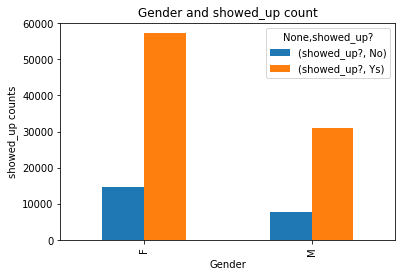

In [52]:
#plot of bar chart
df_gender.unstack().plot(kind="bar")
plt.title("Gender and showed_up count")
plt.ylabel("showed_up counts");

### Finding.
> *Evidently, more female patients showed up for their medical appointments than the male patients.**

### Question 2

#### Are age and gender a factor in keeping to scheduled date among patients?

> To investigate the question, patients will be classified into age groups based on the age classification published here: https://ieeexplore.ieee.org/document/6416855

In [53]:
#Bin ages into the classification 
bins = [0, 12, 18, 59, 115]
labels =["child", "Adolescent", "adult", "senior_adult"]
df["age_group"] = pd.cut(df["Age"], bins, labels=labels, include_lowest = True)                                      

In [54]:
df.head() #check if age_group is included 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,Handcap,SMS_received,showed_up?,age_group
0,2.98724998243e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,0,No,Ys,senior_adult
1,5.58997776694e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,0,No,Ys,adult
2,4.26296229995e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,0,No,Ys,senior_adult
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,0,No,Ys,child
4,8.84118644818e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,0,No,Ys,adult


> *Age_group is included in dataframe* 

In [55]:
#Group data by age_group,  Gender and showed up
df_age = df.groupby(["age_group", "Gender"])["showed_up?"].value_counts().to_frame() 
df_age


showed_up?
age_group    Gender showed_up?            
child        F      Ys                7972
                    No                2050
             M      Ys                8757
                    No                2257
Adolescent   F      Ys                3672
                    No                1260
             M      Ys                2118
                    No                 780
adult        F      Ys               33554
                    No                9044
             M      Ys               14203
                    No                3686
senior_adult F      Ys               12047
                    No                2240
             M      Ys                5884
                    No                1002

### Findings.

> Except for the male children having higher show up rate, apparently, more female in all of the age groups outpaced the males to show up on an appointment day. 

> While the results in this analysis corroborate earlier findings in 'Question 1' above, quite a larger number of the women who showed up on their appointment date are adult women: far above the adolescent and older females.


### Question 3

#### How does an underlying health conditions among the genders influences showing up for appointments among patients?

>*First is to examine the percentage spread of each diseases among the genders and then examine how this affects showing up on scheduled date when they are grouped.*



In [56]:
#the data is grouped by gender and diabetes 
df_diabetes = df.groupby("Gender")["Diabetes"].value_counts(normalize=True)
df_diabetes = df_diabetes. mul(100).rename('Percent').to_frame()
df_diabetes

Percent
Gender Diabetes           
F      No        92.196439
       Yes        7.803561
M      No        93.959211
       Yes        6.040789

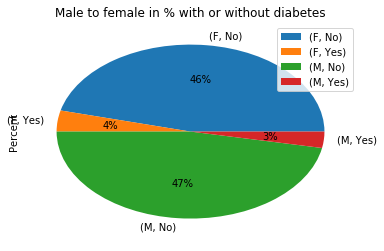

In [57]:
df_diabetes.plot(kind="pie",
                y = 'Percent',
                autopct='%1.0f%%',
                title = 'Male to female in % with or without diabetes'
);

> *Majority patients of both gender did not have diabetes.*

> *However,the result also show that a little higher percentage of females, relative to the male patients, are presenting with diabetes at the hospitals.*

> *Could this influence how women show up?*

In [58]:
#the data is group by gender, diabetes and showed_up 
df_diabetes_show = df.groupby(["Gender", "Diabetes"])["showed_up?"].value_counts()
df_diabetes_show = df_diabetes_show.rename('showed_up_counts').to_frame()
df_diabetes_show

showed_up_counts
Gender Diabetes showed_up?                  
F      No       Ys                     52656
                No                     13577
       Yes      Ys                      4589
                No                      1017
M      No       Ys                     29038
                No                      7312
       Yes      Ys                      1924
                No                       413

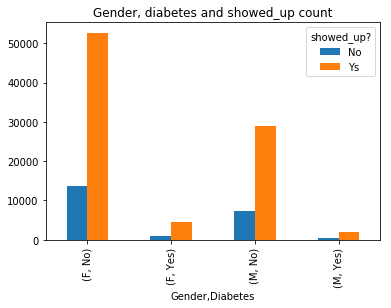

In [64]:
#plot bar char
df_diabetes_show.unstack().plot(kind= "bar",
                title = "Gender, diabetes and showed_up count",
                y = "showed_up_counts"
);


>*As previously noted, regardless of an underlying health challenge, women topped the chart of showing for appointment.* 

>*However, there is a relative spike in showing up for appointment if a patient is diabetic and particularly female.*

In [65]:
#the data is grouped by gender and hypertension 
df_hypertention = df.groupby("Gender")["hypertension"].value_counts(normalize=True)
df_hypertention = df_hypertention. mul(100).rename('Percent').to_frame()
df_hypertention 

Percent
Gender hypertension           
F      No            78.648088
       Yes           21.351912
M      No            83.296715
       Yes           16.703285

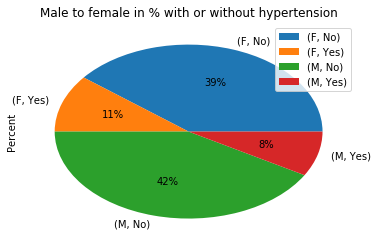

In [66]:
df_hypertention.plot(kind="pie",
                y = 'Percent',
                autopct='%1.0f%%',
                title = 'Male to female in % with or without hypertension' 
);

> *A greater percentage of both genders are presenting with hypertension than those of diabetes.*

> *As was the case in diabetes, a much higher percentage of females, relative to male patients, are presenting with hypertension at the hospitals.* 

> *Could it be that this also influence how the genders show up for appointment.*

In [67]:
#the data is grouped by gender, hypertension and showed_up
df_hypertention_show = df.groupby(["Gender", "hypertension"])["showed_up?"].value_counts() 
df_hypertention_show = df_hypertention_show.rename('showed_up_count').to_frame()
df_hypertention_show

showed_up_count
Gender hypertension showed_up?                 
F      No           Ys                    44563
                    No                    11937
       Yes          Ys                    12682
                    No                     2657
M      No           Ys                    25615
                    No                     6610
       Yes          Ys                     5347
                    No                     1115

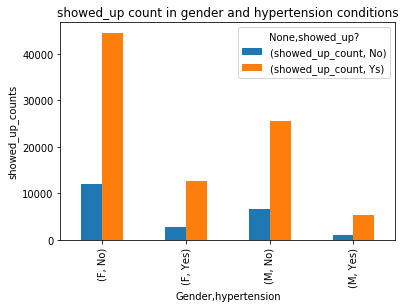

In [70]:
#plot bar chart
df_hypertention_show.unstack().plot.bar()
plt.title("showed_up count in gender and hypertension conditions")
plt.ylabel("showed_up_counts");

> *Similar to previous results, patients with hypertension, irrespective of gender, are more likely to show up for appointment than not. This is even more true if the patient is female.*

In [71]:
#the data is grouped by gender and diabetes 
df_alcohol = df.groupby("Gender")["Alcoholism"].value_counts(normalize=True)
df_alcohol = df_alcohol.mul(100).rename('Percent').to_frame()
df_alcohol

Percent
Gender Alcoholism           
F      No          98.297582
       Yes          1.702418
M      No          94.476181
       Yes          5.523819

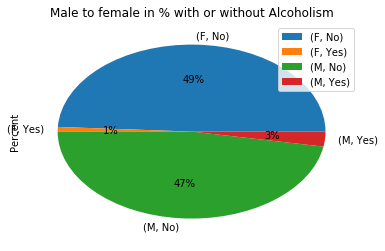

In [73]:
df_alcohol.plot(kind="pie",
                y = 'Percent',
                autopct='%1.0f%%',
                title = 'Male to female in % with or without Alcoholism' 
);

> *In contrast to previous analysis, more males, relative to female patients are presenting with alcoholism at the hospitals.*

> *But does this help to improve show up among male patients?*

In [77]:
#the data is grouped by gender alcoholism and showed_up 
df_alcohol_show = df.groupby(["Gender", "Alcoholism"])["showed_up?"].value_counts()
df_alcohol_show = df_alcohol_show.rename('showed_up_counts').to_frame()
df_alcohol_show

showed_up_counts
Gender Alcoholism showed_up?                  
F      No         Ys                     56330
                  No                     14286
       Yes        Ys                       915
                  No                       308
M      No         Ys                     29194
                  No                      7356
       Yes        Ys                      1768
                  No                       369

> *Apparently, alcoholism improves the likelihood of male patients at showing up for appointment.*

A summary of the explorations above presented in a bar chart.

In [78]:
#A collective grouping of the three health conditions analysed above.
df_all = df.groupby(["Gender", "hypertension", "Diabetes",  "Alcoholism"])["showed_up?"].value_counts()
df_all.to_frame().head()

showed_up?
Gender hypertension Diabetes Alcoholism showed_up?            
F      No           No       No         Ys               43296
                                        No               11552
                             Yes        Ys                 529
                                        No                 202
                    Yes      No         Ys                 722

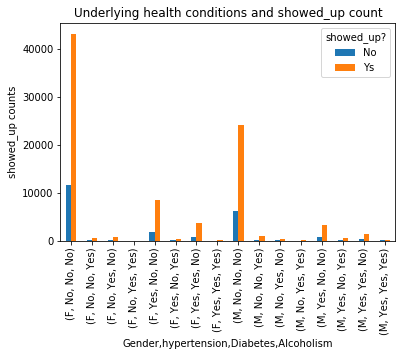

In [79]:
#plot bar chart 
df_all.unstack().plot.bar()
plt.title("Underlying health conditions and showed_up count")
plt.ylabel("showed_up counts");

### Findings. 

> *Without any underlying illnesses and irrespective of gender of any underlying illnesses, most patients showed up for appointment.*

> *However, some long term diseases, notably hypertension and diabetes, or their combinations appears likely to motivate patients, more so females, to show up on appointment days and could be indicators in predicting whether a patient will keep appointment or otherwise.*

> *Alcoholism appears notably a great predictor for patients to show, particularly if they are male.*

<a id='conclusions'></a>
## Conclusions

> *The aim of the investigation conducted above was to answer some questions by exploring the dataset of "No show appointments" collected from some hospitals in Brazil.*

> *The target of the dataset was the show up column which tells whether a patient showed up or otherwise.*

> *Some features in the dataset were thought to influence rate of show up among the patients and were hence, investigated.*

During explorations of the dataset, the following information could be deduced:

> *Irrespective of any underlying illness, most patients, approximately 80%, showed up for appointment.*

> *However, majority of the patients were females, as such, much more of them than males showed up for appointments.*

> *Diseases like hypertension, diabetes 
and alcoholism has varied distribution among the genders.*

> *Alcoholism was more prevalent among male patients while hypertension and diabetes, in descending order, were more likely in females.*

> *These diseases tend to promote show up of patients as majority of the sufferers showed up on the scheduled appointment day.*

In essence, the dataset has written all over it women's participation in health and wellbeing responses than the males in irrespective of diseased state. However, participations are better for some patients if diseased. 

#### Limitation 

> *One limitations of the dataset is the lack of detailed information about all or most of the diagnosis or illness of the patients. In particular, the nature of illnesses of patients who showed up but had non of the diseases in the dataset.*

> *So we don't know why these patients showed up and if the same reason will improve the chance of show up in future appointments.*

> *Hence, additional information would give a better predicting power of how patients will respond to scheduled appointments.* 

#### Suggestions 
> *This investigation is not exhaustive and limited in scope.*

> *It Should be further explored with the appointmentsDay, ScheduledDay, Handicap and SMS_received features of the dataset and if they offer further insights into what may influence show up.*

> *The data may also be suitable for forecasting and should be analyse further with some regression algorithm.* 


In [80]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0